## Table of Content: <a class="anchor" id="table-of-content"></a>
* [1. Problem Background and Motivation](#problem-background)
* [2. Import Packages](#import-package)
* [3. Data Preparation](#data-preparation)
* [4. Machine Learning Model](#ml-model)
* [5. Conclusion](#model-conclusion)

# 1. Problem Background & Motivation

## What is the problem?

Buying a brand-new car is becoming more difficult than ever. In addition to the availability problems generated by supply chain constraints and the lack of semiconductors, people looking for a new car face a significant price increase.

It's not just about which car to choose and how long to wait for it. It's also about how much more you'll pay for the same car that you could have afforded a just a few years ago. For the first time ever, the average price of a new car has edged past $47,000, according to a new report from Kelley Blue Book and data from TrueCar, a CR partner that provides market analysis and an online marketplace for cars. Buying a car—just about any car—has been difficult for months now, and new data shows that new cars, like used ones, are costing consumers more than ever. 
<center>
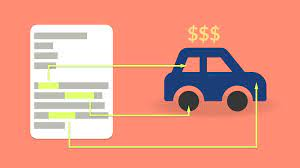 </center>

The main reason for the sudden surge in the prices is below:
> **Semiconductor shortage** : Semiconductor shortage and and supply chain woes have caused major setbacks in production, and the costs of making and moving the cars have gone up. Blame it all on the pandemic and the resulting global semiconductor shortage that has hobbled automakers’ ability to crank out new cars, crimping supply, pushing up prices, and limiting availability.

## Motivation
As a part of the data-challenge, my task is to build a regression model based on the feature variables to predict the manufacture suggested price of the car. With the help of the regression model, the management of car companies can understand the variation of car prices depending on the feature variables and can thereby manipulate their designs and business strategies.

* [Go to Top](#table-of-content)


# 2. Import Packages  <a class="anchor" id="import-package"></a>
> **Numpy** : NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. <br> <br>
 **Pandas** : Pandas is a software library written for the Python programming language for data manipulation and analysis. <br> <br>
 **Math Module** : Math module provides access to the mathematical functions defined by the C standard. <br> <br>
 
 ##### The graphic libraries
 
 >**Seaborn** : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. <br> <br>
 **Matplotlib** : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
 
 ##### The Machine Learning Libraries
 >**Sklearn** : Scikit-learn is a free software machine learning library for the Python programming language featuring various classification, regression and clustering algorithms.
 
 * [Go to Top](#table-of-content)

In [28]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import math

# Graphics
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error

import statsmodels.api as sm

# 3. Data Preparation <a class="anchor" id="data-preparation"></a>

In [29]:
#Once the libraries are imported, we need to load/read our real-life historical data on which the regression model is trained. 
#We do this with the help of our analytical library pandas. Pandas creates a 2-D data structure also known as dataframe for the purpose of easy understanding and viewing of our data

df = pd.read_csv('Car.csv')

df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


### 3.1 Data Exploration & Transformation

In [30]:
# Step 1: Check for duplicate records in our data to avoid redundancy.

# remove duplicates
#print('Number of records:', len(df))
#df.drop_duplicates()
#print('Number of records after dropping dupes:', len(df))

#Step 2: Rename the columns for better understanding
#For example: Rename the city mpg to City MPG for consistency along our data and Engine HP to Horse power
df.rename(columns={'city mpg': 'city MPG', 'Engine HP' : 'Horse_Power'}, inplace=True)
#df.columns

#Step 3
#Check for the information of our data in each column 
#df.info()

#Step 4
#Check for kpis of our data
#df.describe()

#Step 5 Check for the data types in our data, with this we can interpret whether there are any string values
#df.dtypes

#Step 6 Check for null values
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Horse_Power            69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city MPG                0
Popularity              0
MSRP                    0
dtype: int64

>**Clean up information**
>> i) We interpret that there are no duplicates in our data. <br>
>> ii) We see that there are columns like Make, Model, Engine fuel type, Transmission Type, Driven Wheels, Market Category, Vehicle Size, Vehicle Style which have data type as Object which determines it has categorical values or missing values. <br> 
>> iii) We see missing values for the following columns: <br>
**Engine Fuel Type** : Filled the missing values with "regular unleaded" depending on the values similar to the same records in the dataset.
**Engine HP** : it has 69 values missing, we will fix it by taking the mean of all other records in the column. <br>
**Engine Cylinders** : it has 30 missing records, we will fix it by taking the mean of all other records in the column. <br>
**Market Category** : it has 3742 records missing which have 'NA' as values in the cells, drop all NA for now. Pandas treats 'NA', 'na' as null values. <br>
**Number of Doors** : it has 4 missing records, we will fill it by the mean of all other records in the column.<br>
>>iv) We see that the columns Make, Model, Market Category, Vehicle Size, Vehicle Style, Engine Fuel Type have categorical values which need to be converted into numeric values. 


In [31]:
#We will fill the missing records in number of doors, engine hp and engine cylinders column with mean records. 
df['Number of Doors'].fillna(df['Number of Doors'].mean(), inplace = True)
df['Horse_Power'].fillna(df['Horse_Power'].mean(), inplace = True)
df['Engine Cylinders'].fillna(df['Engine Cylinders'].mean(), inplace = True)



In [32]:
#We will drop all the NA in Market Category
df.dropna(inplace=True)
#We re-check for any null records now
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Horse_Power          0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city MPG             0
Popularity           0
MSRP                 0
dtype: int64

Now our data contains no missing values and ready for further exploration

>**Exploration of Numerical Data**
>> Feature Selection

In [33]:
#This function will help us to find out outliers, if any variable has value 2 standard deviation away from mean, it has outlier data. 
def my_summary_stats(X,feature_list):
    temp = pd.DataFrame(dict(mean = X[feature_list].mean().round(2),
                             median = X[feature_list].median().round(2),
                             std_dev = X[feature_list].std().round(2),
                             min_val = X[feature_list].min().round(2),
                             max_val = X[feature_list].max().round(2),
                             outlier_issue = np.where(X[feature_list].std()/X[feature_list].mean() > 2,
                                                      True,False)
                            ))
    return temp

In [34]:
#Create a list of all the numerical variables in our dataset for data exploration.
numerical_vars = ['MSRP','Popularity','city MPG','highway MPG',
                'Number of Doors','Engine Cylinders',
                 'Year']

#print(numerical_vars)

#Step 7: Check for outliers in our data
#What are outliers?
#An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.
#Here we are plotting a table with mean, median, standard deviation, min value, max value and an additional binary feature displaying the presence of outlier
#depending on standardeviation divided by mean if greater than 2 outlier is present. 


my_summary_stats(df,numerical_vars)

,mean,median,std_dev,min_val,max_val,outlier_issue
MSRP,50042.85,35010.0,70012.84,2000.0,2065902.0,False
Popularity,1499.06,1013.0,1413.50,2.0,5657.0,False
city MPG,20.08,18.0,10.02,7.0,137.0,False
highway MPG,27.07,26.0,9.51,12.0,354.0,False
Number of Doors,3.42,4.0,0.90,2.0,4.0,False
Engine Cylinders,5.75,6.0,1.92,0.0,16.0,False
Year,2012.08,2015.0,6.30,1990.0,2017.0,False


<AxesSubplot:xlabel='MSRP'>

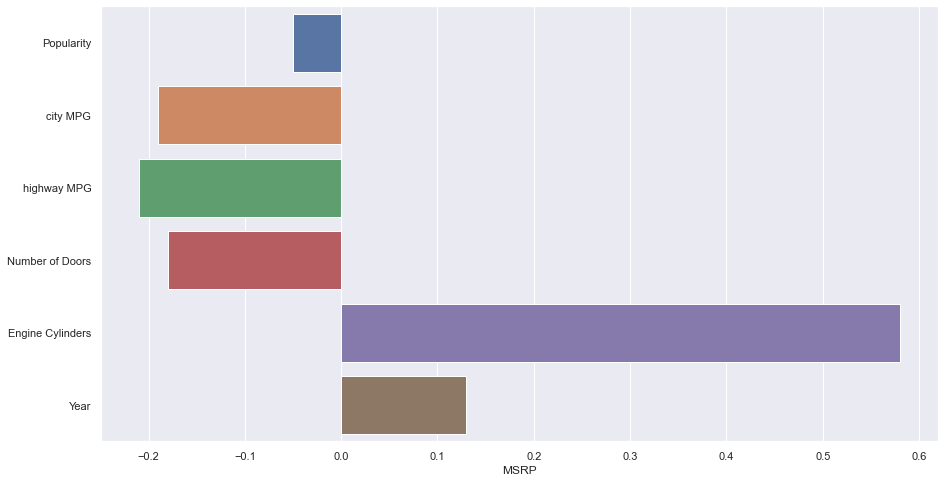

In [35]:
#Step 8: We will now plot a barplot interpreting the correlation of all numerical variables with respect to our target variable MSRP
#A bar plot makes it easy to interpret correlations visually, thus I chose to use a barplot for inferring the correlation. 
a = df[numerical_vars].corr()[['MSRP']].round(2)
sns.set(rc= {'figure.figsize':(15,8)})
sns.barplot(x=a.MSRP[1:],y=a.index[1:],data=a, orient='h')

In [36]:
#Step 9: Check for correlation of feature variables with other feature variables which gives us information about how different feature variables are relted with each other.
df[['MSRP','Popularity','city MPG','highway MPG',
                 'Number of Doors','Engine Cylinders','Horse_Power',
                 'Year']].corr().round(2)

,MSRP,Popularity,city MPG,highway MPG,Number of Doors,Engine Cylinders,Horse_Power,Year
MSRP,1.00,-0.05,-0.19,-0.21,-0.18,0.58,0.66,0.13
Popularity,-0.05,1.00,0.03,0.03,-0.04,0.01,0.04,0.12
city MPG,-0.19,0.03,1.00,0.88,0.12,-0.55,-0.39,0.16
highway MPG,-0.21,0.03,0.88,1.00,0.10,-0.58,-0.40,0.20
Number of Doors,-0.18,-0.04,0.12,0.10,1.00,-0.18,-0.20,0.19
Engine Cylinders,0.58,0.01,-0.55,-0.58,-0.18,1.00,0.80,-0.05
Horse_Power,0.66,0.04,-0.39,-0.40,-0.20,0.80,1.00,0.24
Year,0.13,0.12,0.16,0.20,0.19,-0.05,0.24,1.00


>**Interpretation**:
>>i) We interpret that there are no outliers in our data.<br>
>>ii)From the correlation plot we find the below numerical variables important for our modeling purpose: <br>
a. **Engine HP** (correlation coefficient greater than 0.2 and positively correlated) <br>
b. **Engine Cylinders** (correlation coefficient greater than 0.2 and positively correlated) <br>
c. **Highway MPG** (correlation coefficient greater than -0.2 and negatively correlated) <br>
d. **City MPG** (We notice that City MPG has a strong correlation with Engine HP, Engine Cylinders, Highway MPG and is negatively correlated with MSRP)

* [Go to Top](#table-of-content)

In [37]:
#We will drop all the other not required numerical vaiales
df = df.drop(['Popularity','Number of Doors','Year'], axis=1)

>**Exploration of Categorical Data**
>> Feature Selection

In [38]:
#Find unique values for categorical variables
uniqueValues = df.nunique()                                                         #unique helps to check unique values for each column in our data
print('Count of unique value in each column :')
print(uniqueValues)

Count of unique value in each column :
Make                   48
Model                 723
Engine Fuel Type        9
Horse_Power           330
Engine Cylinders       10
Transmission Type       5
Driven_Wheels           4
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            58
city MPG               68
MSRP                 4680
dtype: int64


In [39]:
#Step 10: We now create a list containing all the categorical columns and then find a mean of all the values with respect to our target variable
categorical_vars = ['object']
X = pd.merge(df['MSRP'],df.select_dtypes(include=categorical_vars),left_index=True,right_index=True)
def target_by_cats(X):
    global_mean = X.iloc[:,0].mean()
    target = X.columns[0]
    for col in X.columns[1:]:
        df_group = X.groupby(by=col)[target].agg(['mean']).round(2)
        df_group['diff'] = (df_group['mean'] - global_mean).round(2)
        display(df_group)
target_by_cats(X)

,mean,diff
Make,,
Acura,34887.59,-15155.26
Alfa Romeo,61600.00,11557.15
Aston Martin,197910.38,147867.53
Audi,53452.11,3409.26
BMW,61546.76,11503.91
Bentley,247169.32,197126.47
Bugatti,1757223.67,1707180.82
Buick,33770.40,-16272.45
Cadillac,56231.32,6188.47


,mean,diff
Model,,
1 Series,37853.12,-12189.73
1 Series M,46135.00,-3907.85
100,2000.00,-48042.85
124 Spider,26895.00,-23147.85
190-Class,2000.00,-48042.85
...,...,...
iM,18830.00,-31212.85
iQ,16168.75,-33874.10
tC,21546.43,-28496.42


,mean,diff
Engine Fuel Type,,
diesel,40788.00,-9254.85
electric,49065.41,-977.44
flex-fuel (premium unleaded recommended/E85),48641.92,-1400.93
flex-fuel (premium unleaded required/E85),159429.35,109386.50
flex-fuel (unleaded/E85),36480.99,-13561.86
flex-fuel (unleaded/natural gas),39194.17,-10848.68
premium unleaded (recommended),41152.79,-8890.06
premium unleaded (required),102319.12,52276.27
regular unleaded,26367.93,-23674.92


,mean,diff
Transmission Type,,
AUTOMATED_MANUAL,101219.78,51176.93
AUTOMATIC,48177.80,-1865.05
DIRECT_DRIVE,48391.03,-1651.82
MANUAL,38189.12,-11853.73
UNKNOWN,8096.67,-41946.18


,mean,diff
Driven_Wheels,,
all wheel drive,61290.36,11247.51
four wheel drive,48573.91,-1468.94
front wheel drive,25816.26,-24226.59
rear wheel drive,69469.93,19427.08


,mean,diff
Market Category,,
Crossover,30068.89,-19973.96
"Crossover,Diesel",54622.14,4579.29
"Crossover,Exotic,Luxury,High-Performance",83000.00,32957.15
"Crossover,Exotic,Luxury,Performance",72000.00,21957.15
"Crossover,Factory Tuner,Luxury,High-Performance",91916.15,41873.30
...,...,...
"Luxury,Hybrid",54789.52,4746.67
"Luxury,Performance",46596.04,-3446.81
"Luxury,Performance,Hybrid",66921.82,16878.97


,mean,diff
Vehicle Size,,
Compact,43940.59,-6102.26
Large,67577.32,17534.47
Midsize,45588.52,-4454.33


,mean,diff
Vehicle Style,,
2dr Hatchback,16867.71,-33175.14
2dr SUV,34941.36,-15101.49
4dr Hatchback,22420.87,-27621.98
4dr SUV,42407.03,-7635.82
Cargo Minivan,22964.00,-27078.85
Cargo Van,30724.71,-19318.14
Convertible,95465.31,45422.46
Convertible SUV,46134.33,-3908.52
Coupe,92896.22,42853.37


**Interpretation**
>Looking at the unique values in the following categorical columnms: <br>
>1. Make (48 Unique values) (I feel it has too many unique values and it will create these many new binary columns making it more complex model hence reject it) <br>
>2. Model (723 Unique values) (The model also consists of various unique values which would generate too many columns making it more complex hence reject it) <br>
>3. Engine Fuel Type (9 Unique values) (The engine fuel type has fewer unique values which can be clubbed as a dictionary object and be used in our model to understand variation thus accept it in the feature variable.) <br>
>4. Transmission Type (5 Unique values) (The transmission fuel type has fewer unique values and a variation in the mean values as well, thus accpet it)  <br>
>5. Driven Wheels (4 Unique Values) (The driven wheels has fewer unique values and a variation in the mean values as well thus accept it.)  <br>
>6. Market Category (71 Unique Values) (Market category again would become very difficult to transform because of 71 unique values thus reject.) <br>
>7. Vehicle Size (3 Unique values) (The Vehicle size has fewer unique values and a variation in the mean values as well thus accept it.) <br>
>8. Vehicle Style ( 16 Unique values) (Vehicle Style again would become very difficult to transform because of 71 unique values thus reject.) <br>

>**Transformation of our data**

In [40]:
#Here I am creating a dictionary containing Engine Fuel as keys and Fuel Type as values for the purpose of easy categorization and thereby conversion of categorical values into binary
dict1 = {"diesel": ['diesel'],
     "electric": ['electric'],
     "regular unleaded": ['regular unleaded'],
     'flex-fuel':['premium unleaded recommended/E85','premium unleaded required/E85','unleaded/E85','unleaded/natural gas'],
     'premium unleaded':['recommended','required'],
    }

# We now convert our newly created dictionary into a dataframe
temp = pd.Series(dict1).explode().sort_values().to_frame().reset_index()
#print(temp)
temp.columns = ['Engine Fuel Type','Fuel_Type']                               #We give columns a descriptive name
#print(temp)
# Apply left join to merge the newly created dta frame values into ur original data frame by using common column Engine Fuel Type
df = pd.merge(left = df,right = temp, how='left', left_on='Engine Fuel Type', right_on='Engine Fuel Type')
# drop old vehicle style variable
#print(df)
df.drop('Engine Fuel Type',axis=1,inplace=True)                 #Drop the original Engine Fuel Type to void redundancy

In [41]:
#We now select categorical data that are selected to be our feature variables.
categorical_values = ['Vehicle Size','Transmission Type','Driven_Wheels', 'Fuel_Type']
    
for var in categorical_values:
   df[var] = df[var].astype("category")

df = pd.get_dummies(df,columns=categorical_values, prefix_sep='_', drop_first=True)
#print(df)

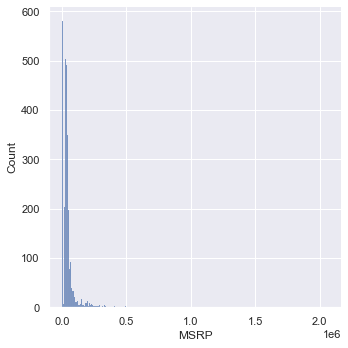

In [42]:
#Let us now check the distribution of our Target variable using a distribution plot.
sns.displot(df['MSRP'])

>**Interpretation** <br>
We notice that the distribution is quite skewed towards the left. To solve the skewness problem, we will apply log transformation to our target variable.

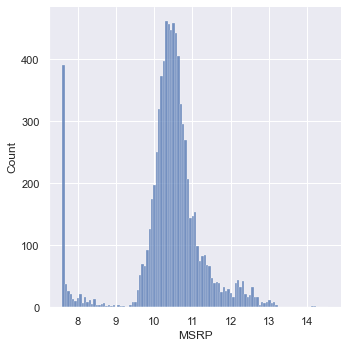

In [43]:
sns.displot(np.log1p(df['MSRP']))

>**Interpretation** <br>
Note now the skewness has been reduced. 
* [Go to Top](#table-of-content)

# 4. Modeling <a class="anchor" id="ml-model"></a>

In [44]:
df['ln_MSRP'] = np.log1p(df['MSRP'])                               #Creating a new column with log transformed values of our target variable
#print(df)
#dividing our target and feature variables
predictors = ['city MPG','highway MPG','Engine Cylinders','Horse_Power','Driven_Wheels_rear wheel drive','Driven_Wheels_front wheel drive',
             'Driven_Wheels_four wheel drive','Transmission Type_UNKNOWN','Transmission Type_MANUAL','Transmission Type_DIRECT_DRIVE','Transmission Type_AUTOMATIC',
             'Vehicle Size_Midsize','Vehicle Size_Large', 'Fuel_Type_electric']

target = ['ln_MSRP']

X = df[predictors]
y = df[target]

# Split our data randomnly in a ratio 70:30, 70% Train data and 30% Test data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=2)

>### Creating Test measures for checking accuracy of our model
>>**What is R2?** <br>
>>--R2 score works by measuring the amount of variance in the predictions explained by the dataset. <br>
>> **What is Adj-R2?** <br>
>>--Adjusted R-squared adjusts the statistic based on the number of independent variables in the model. R 2 shows how well terms (data points) fit a curve or line. <br>
>> **What is MAE?** <br>
>>-Mean Absolute Error (MAE)? MAE (Mean absolute error) is the average absolute (absolute means the non negative) error between actual and predicted values, and is a common metric to use for regression machine learning models. <br>
>> **What is MAPE?** <br>
>>-- MAPE or MEAN ABSOLUTE PERCENTAGE ERROR is the average of the absolute percentage errors of each entry in a dataset, showing, on average, how accurate the forecasted quantities were in comparison with the actual quantities. <br>
>> **What is SSE?** <br>
>>-- The sum of squared differences between predicted data points and observed data points.

In [45]:
def train_test_metrics(X_train,X_test,y_train,y_test,model):
    names=['R2','Adj-R2','MAE','MAPE','SSE'] 
    
    # Training Metrics
    y_hat = model.predict(X_train)
    
    # Create R2
    r2 = r2_score(y_train,y_hat).round(3)
    
    # Create adj_R2
    adj_r2 = (1-(1-r2_score(y_train,y_hat))*(len(y_train)-1)/(len(y_train)-len(model.coef_)-1)).round(3)

    
    train_metrics = [r2, adj_r2,
                     mean_absolute_error(y_train,y_hat).round(3),
                     mean_absolute_percentage_error(y_train,y_hat).round(3)*100,
                     (mean_squared_error(y_train,y_hat)*len(y_train)).round(3)
                    ]
    train_metrics = pd.DataFrame({'Train':train_metrics},index=names)
    
    # Testing Metrics
    y_hat = model.predict(X_test)
    test_metrics = [r2_score(y_test,y_hat).round(3),
                    (1-(1-r2_score(y_test,y_hat))*(len(y_test)-1)/(len(y_test)-len(model.coef_)-1)).round(3),
                    mean_absolute_error(y_test,y_hat).round(3),
                    mean_absolute_percentage_error(y_test,y_hat).round(3)*100,
                    (mean_squared_error(y_test,y_hat)*len(y_test)).round(3)
                   ]
    test_metrics = pd.DataFrame({'Test':test_metrics},index=names)
    
    all_metrics = train_metrics.merge(test_metrics,left_index=True,right_index=True)
    print(all_metrics)



**Model 1** <br>
Let us consider Horse Power as the one variable best fit for our model because it had a correlation greater than 0.4 and then interpret our prediction results.

In [46]:
simple_var = ['Horse_Power']

model = LinearRegression()
model.fit(X_train[simple_var],y_train)
# Display Output
train_test_metrics(X_train[simple_var],X_test[simple_var],y_train,y_test,model)

           Train      Test
R2         0.492     0.499
Adj-R2     0.492     0.499
MAE        0.446     0.424
MAPE       4.700     4.500
SSE     2793.130  1064.637


In [47]:
round((math.exp(model.coef_[0])-1)*100,2)

0.6

**Results from Model 1** <br>
The MAPE of our Training data is 4.700 and the MAPE of our Testing data is 4.500. <br>

The results are quite contradictory since our model performs bad on train data and well on test data. While there is no evidence of overfitting, but the MAE value is huge considering the Log transformation. The overall performance of model is thus not acceptable.

**Coefficient Interpretation**
The coefficient parameter tells us that for an additional horse power we expect the price to go up by 6%. 

<AxesSubplot:xlabel='MSRP', ylabel='Horse_Power'>

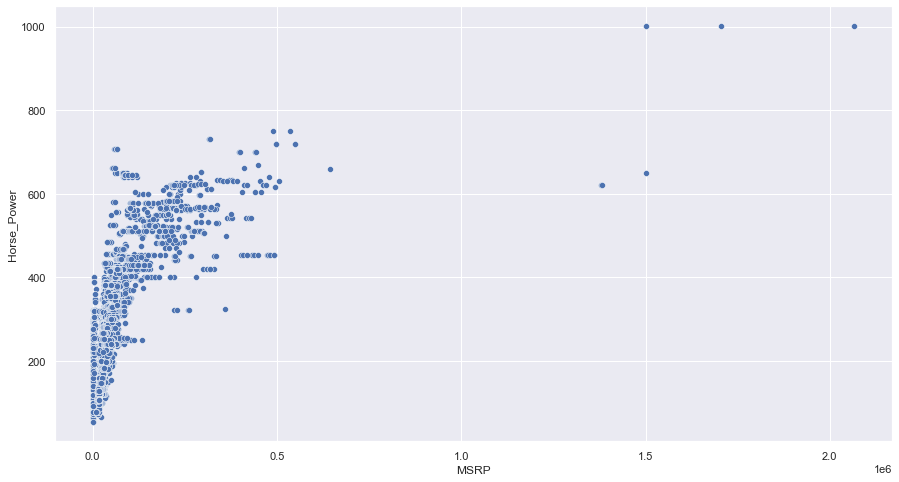

In [48]:
#We now plot MSRP values with respect to Horse Power to understand the distribution of price, we see there are certain MSRP values in the left and right that fall out of our range which are considered outliers.
#Why Scatterplot?
#Scatterplot can show the extent of correlation, if any, between the values of observed quantities. If no correlation exists between the variables, the points appear randomly scattered on the coordinate plane which are basically outliers.
sns.scatterplot(x="MSRP", y="Horse_Power", data=df)

The plot does show some values of MSRP greater than $150000 that are not acceptable and should be get rid off in order to improve our model performance. 

* [Go to Top](#table-of-content)

**Model 2** <br>
Let us now consider Engine HP one numeric variable and Transmission Type_MANUAL one categorical variable. Also, let us understand the slope shift with respect to Fuel_Type_Electric as slope shifter and interceptor. In other words howdoes the MSRP value vary with respect to Horse power and Fuel Type Electric, since fuel type has a negative correlation with our target variable and Horse power has a positive relation with our target variable.

In [49]:

X_train = X_train.assign(variation_X_MSRP = X_train['Horse_Power'] * X_train['Fuel_Type_electric'])
X_test = X_test.assign(variation_X_MSRP = X_test['Horse_Power'] * X_test['Fuel_Type_electric'])

predictors = ['Horse_Power','Fuel_Type_electric','variation_X_MSRP']

model2b = LinearRegression()
model2b.fit(X_train[predictors],y_train)

# Display Output
train_test_metrics(X_train[predictors],X_test[predictors],y_train,y_test,model2b)


           Train      Test
R2         0.495     0.503
Adj-R2     0.495     0.503
MAE        0.446     0.424
MAPE       4.700     4.500
SSE     2775.644  1055.938


In [50]:
round((math.exp(model2b.coef_[0][0])-1)*100,2)

0.6

**Results from Model2** <br>
The MAPE of our Training data 4.700 and of our testing data is 4.500. 
The results are quite contradictory since our model performs bad on train data and well on test data. While there is no evidence of overfitting, but the MAE value is huge considering the Log transformation. The overall performance of model is thus not acceptable. <br>
**Coefficient Interpretation**
The coefficient parameter tells us that for an additional horse power we expect the price to go up by 6%.

* [Go to Top](#table-of-content)

**Model 3** <br>
Now, we will consider as many as feature variables we can and check the MPE value then. One transformation we will do is take combined value of city MPG and highway MPG.
City MPG is valued at 55% and highway MPG is valued at 45%. These two numbers are combined to give you the combined MPG. A calculation might look like this:


In [51]:
df['Combined_MPG'] = 0.55 *df['city MPG'] + 0.45*df['highway MPG']
#print(df['Combined_MPG'])

variables = ['Horse_Power','Combined_MPG','Vehicle Size_Midsize','Vehicle Size_Large', 'Fuel_Type_electric']

model3 = LinearRegression()
model3.fit(X_train[simple_var],y_train)

# Display Output
train_test_metrics(X_train[simple_var],X_test[simple_var],y_train,y_test,model3)

           Train      Test
R2         0.492     0.499
Adj-R2     0.492     0.499
MAE        0.446     0.424
MAPE       4.700     4.500
SSE     2793.130  1064.637


In [52]:
round((math.exp(model3.coef_[0][0])-1)*100,2)

0.6

**Coefficient Interpretation** <br>
The coefficient parameter tells us that for an additional horse power we expect the price to go up by 6%. 

* [Go to Top](#table-of-content)

# 5. Conclusion <a class="anchor" id="model-conclusion"></a>
I am not quite satisfied with my model performance because of the huge MAPE we are getting. <br>

However, the model performance can be maybe improved by removing the extreme values of MSRP and thereby normalizing our data to bring it in the same range. We could also try taking log transformations of our feature variables.  <br> <br>
One thing that the management of the car companies can note that, with continuous increase in the Engine horse power, Engine Cylinders would increase the price of the car. On the other hand city MPG, highway MPG or (Combine MPG) has a negative relation with our price.

* [Go to Top](#table-of-content)